In [1]:
#Aunalytics Test
#Nikita Mary Sobers(nsobers@umich.edu)
#To determine whether a person makes over 50K a year
#Explain the performance of the model using accuracy, ROC curve and confusion matrix.

In [2]:
#Imports
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [3]:
#Reading the training test
au_train = pd.read_csv(r"~/Documents/DSTest/au_train.csv",sep=',')
#Reading the test test
au_test = pd.read_csv(r"~/Documents/DSTest/au_test.csv",sep=',')


In [4]:
#Let's look at the different features in our test set
au_test.head() #Gives the first five dataset rows


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
#Nneed to create our class label, 1-class above 50K, 0- below 50K
#Note: When I saw the dataset in the pdf, few of the columns contained "?"
#Preprocessing- remove "?"
#We can do one-hot encoding for the rest of the categorical data since there is no ranking between them.
#We can also use Label encoder also
#Need to normalize 

au_test.replace(' ?', np.nan, inplace=True)
au_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
#Now fill the NaN with 0s
au_test = au_test.fillna(0)
au_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,0,321403,HS-grad,9,Widowed,0,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
#Looking at the statistical details of our training set dataset
au_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
#Looking at the statistical details, normalization is definately needed especially for age, fnlwgt, education-num..etc

In [9]:
#Creating a new column for our final class label and Initially set the value to zero 
au_test['label']=0
au_test.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.,0


In [10]:
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
au_test['label'] = au_test.apply(lambda row: 1 if '>50K'in row['class'] else 0, axis=1)


In [11]:
#dropping class and native country
au_test = au_test.drop(['class','native-country'], axis=1)
au_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,18,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,0


In [12]:
data=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','education','workclass','marital-status','occupation','relationship','race','sex','label']

au_test=au_test[data]
au_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,workclass,marital-status,occupation,relationship,race,sex,label
0,25,226802,7,0,0,40,11th,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,38,89814,9,0,0,50,HS-grad,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,28,336951,12,0,0,40,Assoc-acdm,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,44,160323,10,7688,0,40,Some-college,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,18,103497,10,0,0,30,Some-college,0,Never-married,0,Own-child,White,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,Bachelors,Private,Divorced,Prof-specialty,Not-in-family,White,Female,0
16277,64,321403,9,0,0,40,HS-grad,0,Widowed,0,Other-relative,Black,Male,0
16278,38,374983,13,0,0,50,Bachelors,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,0
16279,44,83891,13,5455,0,40,Bachelors,Private,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0


In [13]:
scaler = MinMaxScaler()

au_test.iloc[:,0:-8] = scaler.fit_transform(au_test.iloc[:,0:-8].to_numpy())
au_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,workclass,marital-status,occupation,relationship,race,sex,label
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,11th,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,HS-grad,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,Assoc-acdm,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,Some-college,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,0.013699,0.060942,0.600000,0.000000,0.0,0.295918,Some-college,0,Never-married,0,Own-child,White,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,0.136723,0.800000,0.000000,0.0,0.357143,Bachelors,Private,Divorced,Prof-specialty,Not-in-family,White,Female,0
16277,0.643836,0.208484,0.533333,0.000000,0.0,0.397959,HS-grad,0,Widowed,0,Other-relative,Black,Male,0
16278,0.287671,0.244762,0.800000,0.000000,0.0,0.500000,Bachelors,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,0
16279,0.369863,0.047666,0.800000,0.054551,0.0,0.397959,Bachelors,Private,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0


In [14]:
au_test.shape

(16281, 14)

In [15]:
#Let's use label encoder for converting sex
from sklearn.preprocessing import LabelEncoder
au_test['gender']=""
le = LabelEncoder()
au_test["gender"] = le.fit_transform(au_test["sex"])
au_test[["sex", "gender"]].head(16281)

,sex,gender
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0
...,...,...
16276,Female,0
16277,Male,1
16278,Male,1
16279,Male,1


In [16]:
au_test = au_test.drop(['sex'], axis=1)
au_test


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,workclass,marital-status,occupation,relationship,race,label,gender
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,11th,Private,Never-married,Machine-op-inspct,Own-child,Black,0,1
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,HS-grad,Private,Married-civ-spouse,Farming-fishing,Husband,White,0,1
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,Assoc-acdm,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,1,1
3,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,Some-college,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1
4,0.013699,0.060942,0.600000,0.000000,0.0,0.295918,Some-college,0,Never-married,0,Own-child,White,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,0.136723,0.800000,0.000000,0.0,0.357143,Bachelors,Private,Divorced,Prof-specialty,Not-in-family,White,0,0
16277,0.643836,0.208484,0.533333,0.000000,0.0,0.397959,HS-grad,0,Widowed,0,Other-relative,Black,0,1
16278,0.287671,0.244762,0.800000,0.000000,0.0,0.500000,Bachelors,Private,Married-civ-spouse,Prof-specialty,Husband,White,0,1
16279,0.369863,0.047666,0.800000,0.054551,0.0,0.397959,Bachelors,Private,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,0,1


In [17]:
au_test=pd.get_dummies(au_test, columns=["education", "workclass","race","occupation","relationship","marital-status"])

In [18]:
au_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,gender,education_ 10th,education_ 11th,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.013699,0.060942,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,0.136723,0.800000,0.000000,0.0,0.357143,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16277,0.643836,0.208484,0.533333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16278,0.287671,0.244762,0.800000,0.000000,0.0,0.500000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16279,0.369863,0.047666,0.800000,0.054551,0.0,0.397959,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [19]:
au_train.shape

(32561, 15)

In [20]:
#Repeating same for Training set--->

In [21]:
#Replace ? with NaN
au_train.replace(' ?', np.nan, inplace=True)

#Now fill the NaN with 0s
au_train = au_train.fillna(0)
#Creating a new column for our final class label and Initially set the value to zero 
au_train['label']=0
au_train


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [22]:
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
au_train['label'] = au_train.apply(lambda row: 1 if '>50K'in row['class'] else 0, axis=1)


In [23]:
#dropping class column and native country 
au_train = au_train.drop(['class','native-country'], axis=1)


In [24]:
data=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','education','workclass','marital-status','occupation','relationship','race','sex','label']

au_train=au_train[data]
au_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,workclass,marital-status,occupation,relationship,race,sex,label
0,39,77516,13,2174,0,40,Bachelors,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,50,83311,13,0,0,13,Bachelors,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,38,215646,9,0,0,40,HS-grad,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,53,234721,7,0,0,40,11th,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,28,338409,13,0,0,40,Bachelors,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,Assoc-acdm,Private,Married-civ-spouse,Tech-support,Wife,White,Female,0
32557,40,154374,9,0,0,40,HS-grad,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
32558,58,151910,9,0,0,40,HS-grad,Private,Widowed,Adm-clerical,Unmarried,White,Female,0
32559,22,201490,9,0,0,20,HS-grad,Private,Never-married,Adm-clerical,Own-child,White,Male,0


In [25]:
scaler = MinMaxScaler()

au_train.iloc[:,0:-8] = scaler.fit_transform(au_train.iloc[:,0:-8].to_numpy())
au_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education,workclass,marital-status,occupation,relationship,race,sex,label
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,Bachelors,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,Bachelors,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,HS-grad,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,11th,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,Bachelors,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,Assoc-acdm,Private,Married-civ-spouse,Tech-support,Wife,White,Female,0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,HS-grad,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,HS-grad,Private,Widowed,Adm-clerical,Unmarried,White,Female,0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,HS-grad,Private,Never-married,Adm-clerical,Own-child,White,Male,0


In [26]:
#Let's use label encoder for converting sex
from sklearn.preprocessing import LabelEncoder
au_train['gender']=""
le = LabelEncoder()
au_train["gender"] = le.fit_transform(au_train["sex"])
au_train[["sex", "gender"]].head(32561)

au_train = au_train.drop(['sex'], axis=1)

#perfomring one-hot encoding on the rest
au_train=pd.get_dummies(au_train, columns=["education", "workclass","race","occupation","relationship","marital-status"])



In [27]:
au_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,gender,education_ 10th,education_ 11th,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [28]:
#Performing some predictions-----------

In [29]:
#Assigning training and test data set
X_train2=au_train.loc[:, au_train.columns != 'label']
X_test2=au_test.loc[:, au_test.columns != 'label']
y_train2=au_train['label']
y_test2=au_test['label']


In [30]:
##Assigning training and test data set
X_train=au_train.loc[:, au_train.columns != 'label']
X_test=au_test.loc[:, au_test.columns != 'label']
y_train=au_train['label']
y_test=au_test['label']


In [31]:
from sklearn.naive_bayes import GaussianNB
gauNB = GaussianNB()
gauNB =gauNB.fit(X_train,y_train)
y_pred_gauNB =gauNB.predict(X_test)
y_train_score_gauNB =gauNB.predict(X_train)

print("Accuracy-Gaussian")
accuracy_score(y_test,y_pred_gauNB )

Accuracy-Gaussian


0.6057981696455992

In [32]:
#Since the accuracy was so poor , lets try decision tree
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
Dtree= DecisionTreeClassifier()
Dtree=Dtree.fit(X_train,y_train)
y_pred_Dtree=Dtree.predict(X_test)
y_train_score_Dtree=Dtree.predict(X_train)
print("Accuracy")
accuracy_score(y_test,y_pred_Dtree)

Accuracy


0.7957742153430379

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores.mean()

0.8029603598071512

In [34]:
#https://scikit-learn.org/stable/modules/ensemble.html

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores_pred= cross_val_score(clf, X_test, y_pred_Dtree, cv=5)
scores_pred.mean()


0.816411472489597

In [35]:
from sklearn.ensemble import RandomForestClassifier  #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
random = RandomForestClassifier(max_depth=2, random_state=0)
random =random.fit(X_train,y_train)
print(random.feature_importances_)


[7.26413684e-02 0.00000000e+00 1.27269495e-01 1.12373736e-01
 1.32203360e-02 9.80951048e-03 1.24488058e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.70844431e-02 1.40579298e-02 2.50366891e-02 0.00000000e+00
 0.00000000e+00 2.81754584e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.49436186e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.32696105e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.04781414e-03 6.94702655e-02 0.00000000e+00 3.53170862e-02
 0.00000000e+00 4.52758976e-03 0.00000000e+00 0.00000000e+00
 1.77122963e-01 0.00000000e+00 1.44027770e-04 0.00000000e+00
 0.00000000e+00]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores.mean()

0.8472455848261806

In [37]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[11570,   865],
       [ 1565,  2281]])

In [39]:
from sklearn.metrics import classification_report
target_names = ['Less than 50k', 'More than 50k']
rep=(classification_report(y_test, y_pred, target_names=target_names))

rep

'               precision    recall  f1-score   support\n\nLess than 50k       0.88      0.93      0.90     12435\nMore than 50k       0.73      0.59      0.65      3846\n\n     accuracy                           0.85     16281\n    macro avg       0.80      0.76      0.78     16281\n weighted avg       0.84      0.85      0.85     16281\n'

Text(0.5, 15.0, 'Predicted label')

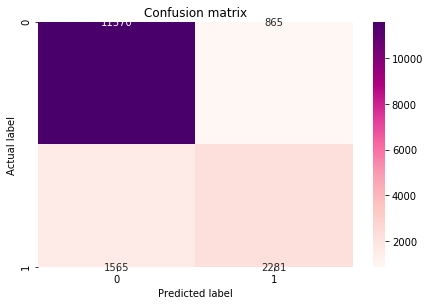

In [40]:
#In the output, 11570 and 2281 are actual predictions, and 865 and 1565 are incorrect predictions.
#visualize the confusion matrix using Heatmap.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
#evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8507462686567164


In [42]:

y_test = [ int(s) for s in y_test]

y_pred = [ int(s) for s in y_pred]

In [43]:
print("Precision:",metrics.precision_score(y_test,y_pred))

Precision: 0.7250476795931341


In [44]:
print("Recall:",metrics.recall_score(y_test,y_pred))

Recall: 0.593083723348934


<function matplotlib.pyplot.show(*args, **kw)>

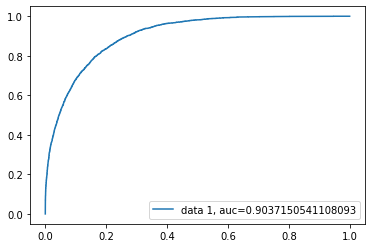

In [45]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
#It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show

In [46]:
#The mean_absolute_error function computes mean absolute error,
#a risk metric corresponding to the expected value of the absolute error loss or -norm loss.

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.14925373134328357

In [47]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)  

#In statistics, explained variation measures the proportion 
#to which a mathematical model accounts for the variation (dispersion) of a given data set. 



0.18300424819566152